# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [5]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
df=pd.read_csv('/datasets/users_behavior.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


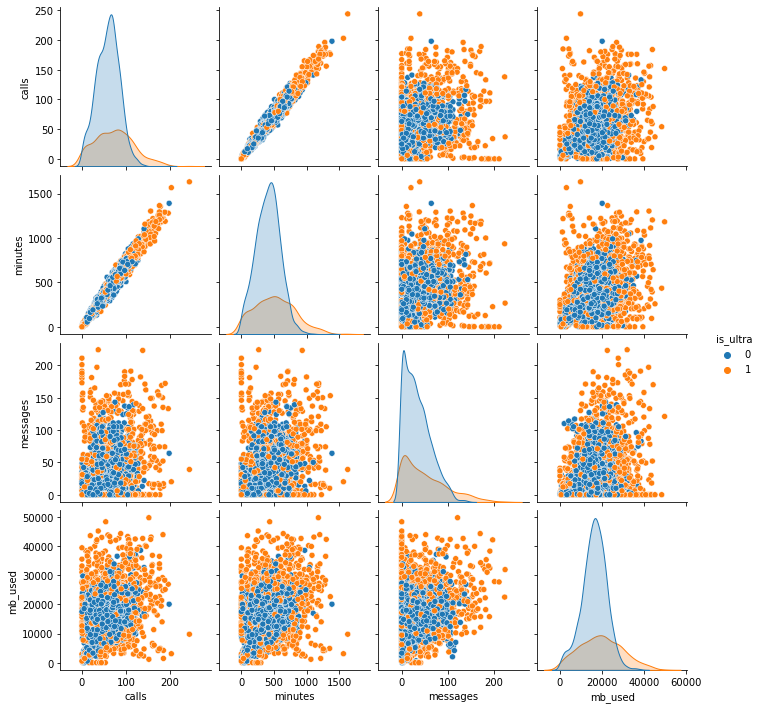

In [11]:
sns.pairplot(df, hue='is_ultra')

## Разбейте данные на выборки

In [7]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

features_train, features_temp, target_train, target_temp = train_test_split(
    features, target, test_size=0.4, random_state=12345) 

features_valid, features_test, target_valid, target_test = train_test_split(features_temp,target_temp,test_size=0.5,train_size=0.5, random_state =12345)


### Результаты

In [8]:
print('Размеры выборок. Обучающая -',round(features_train.shape[0]/df.shape[0],2),', валидационная -', 
      round(features_valid.shape[0]/df.shape[0],2), 'тестовая - ',round(features_test.shape[0]/df.shape[0],2))

Размеры выборок. Обучающая - 0.6 , валидационная - 0.2 тестовая -  0.2


## Исследуйте модели

### RandomForest

In [9]:
best_n_est =0
best_accuracy_valid=0
best_model_RandomForest=None

for n_est in range(10,200,10):
    model = RandomForestClassifier(random_state=12345, n_estimators = n_est) #  инициализируем модель типа случайный лес
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    predictions_valid = model.predict(features_valid) # получите предсказания модели на валидационной выборке
    accuracy_valid = accuracy_score(target_valid,predictions_valid)  
    if accuracy_valid>best_accuracy_valid:
        best_accuracy_valid=accuracy_valid
        best_n_est = n_est
        best_model_Random_Forest = model
print("лучший accuracy модели RandomForest на валидационной выборке:", round(best_accuracy_valid,3), ', n_est=',best_n_est,"\n")


лучший accuracy модели RandomForest на валидационной выборке: 0.792 , n_est= 50 



Лучшая точность RandomForest достигнута с гиперпараметром n_est: 50 ( от 10 до 200).
Получилось 0.792.

### LogisticRegression

In [10]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid) 
accuracy_valid = accuracy_score(target_valid,predictions_valid)
print("accuracy",accuracy_valid, "iterations: 1000")


accuracy 0.7107309486780715 iterations: 1000


Точность такой модели ниже чем требуется, поэтому использовать её мы не будем

### DecisionTreeClassifier

In [11]:
best_accuracy_valid=0
best_model_DecisionTreeClassifier=None
for depth in range(4, 20):
    
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model.fit(features_train, target_train)
 
    predictions_valid = model.predict(features_valid)
    
    
    accuracy_valid = accuracy_score(target_valid,predictions_valid)
    
    if accuracy_valid > best_accuracy_valid:
        best_accuracy_valid = accuracy_valid
        best_depth=depth
        best_model_DecisionTreeClassifier=model
        
print("лучшая точность модели DecisionTreeClassifier на валидационной выборке:", round(best_accuracy_valid,3),'с гиперпараметром depth =', best_depth)


лучшая точность модели DecisionTreeClassifier на валидационной выборке: 0.784 с гиперпараметром depth = 6


### Результат

Модель-победитель на валидационной выборке - RandomForest (n_est= 50)

## Проверьте модель на тестовой выборке

In [12]:
predictions_test=best_model_Random_Forest.predict(features_test)
accuracy_test = accuracy_score(target_test,predictions_test)
print('Точность Random Forest на тестовой выборке',accuracy_test)

Точность Random Forest на тестовой выборке 0.7931570762052877


Точность модели на тестовой выборке превышает 0.79, что удовлетворяет условия задания.

## (бонус) Проверьте модели на адекватность

Создадим DummyClassifier со страгегией most_frequent, проверим его точность

In [61]:
from sklearn.dummy import DummyClassifier;
dclf = DummyClassifier(strategy = 'most_frequent', random_state = 12345 , constant = 'M' )

dclf.fit(features_train, target_train)
dclf.score(features_test, target_test)


0.6842923794712286

наша модель даёт результаты заметно больше DummyClassifier. т.е. модель адекватная